# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df = pd.read_csv("big_reviews.csv")
df.head()

,Unnamed: 0,appid,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,0,620,81941464,english,nic,1607579462,1607579462,True,0,0,...,True,False,False,76561198452822117,46,5,655,294,655.0,1607579365
1,1,620,81937956,english,bad robot say i has too many fat :(\npussle ma...,1607576501,1607576501,True,0,0,...,True,False,False,76561199070929662,10,2,981,981,981.0,1607563603
2,2,620,81935165,english,fun puzzle solving platformer,1607574294,1607574294,True,0,0,...,True,False,False,76561198098986944,31,3,436,436,401.0,1607584846
3,3,620,81934147,spanish,Dijo que estaba con unos kilos de más >:c,1607573466,1607573466,True,1,1,...,True,False,False,76561198311559705,211,25,669,109,669.0,1607573265
4,4,620,81932773,spanish,Besto juego 10/10\n,1607572353,1607572353,True,0,1,...,True,False,False,76561198205456815,26,2,1426,1426,1426.0,1607505449


Convert AppID to AppName.

In [3]:
cleandf = df
# print(df['appid'].unique())
df['appid'] = df['appid'].astype(str)
cleandf['appid'] = df['appid'].map({'620': 'Portal 2', '252950': 'Rocket League', '381210': 'Dead by Daylight', '289070': "Sid Meier's Civilization VI", '264710': "Subnautica", 
    '477160': "Human: Fall Flat", "620980": "Beat Saber", "541210": "Cold Waters", "242920": "Banished", "504230": "Celeste", "240720": "Getting Over It with Bennett Foddy",
    "253230": "A Hat In Time", "728880": "Overcooked! 2", "732810": "Slipstream", "242760": "The Forest", "688130": "Pogostuck: Rage With Your Friends", 
    "621060": "PC Building SImulator", "282560": "RollerCoaster Tycoon World", "577800": "NBA 2K18", "1225330": "NBA 2K21", "258180": "Deus Ex: The Fall", "686600": "Rapture Rejects",
    "583950": "Artifact", "292730": "Call of Duty: Infinite Warfare", "1128000": "Cube World", "841370": "NBA 2K19", "247730": "Nether: Resurrected", "2870": "X Rebirth",
    "1056960": "Wolfenstein: Youngblood", "285190": "Warhammer 40,000: Dawn of War III", "236510": "Takedown: Red Sabre", "834910": "ATLAS", "1180380": "Stay Out",
    "792990": "Identity", "390340": "Umbrella Corps", "723390": "Hunt Down The Freeman", "1015500": "WWE 2K20", "334040": "Down To One", "332200": "Axiom Verge", 
    "275390": "Guacamelee! Super Turbo Championship Edition", "250900": "The Binding of Isacc: Rebirth", "206440": "To the Moon", "200900": "Cave Story+", "297130": "Titan Souls",
    "250760": "Shovel Knight: Treasure Trove", "40800": "Super Meat Boy", "611760": "Don't Escape: 4 Days to Survive", "247240": "Volgarr the Viking", 
    "428550": "Momodora: Reverie Under The Moonlight", "311690": "Enter the Gungeon", "385560": "Shadow Complex Remastered", "283640": "Salt and Sanctuary", "322110": "20XX",
    "367520": "Hollow Knight", "583470": "The End Is Nigh", "427520": "Factorio", "294100": "RimWorld", "581320": "Insurgency: Sandstorm", "646570": "Slay the Spire",
    "227300": "Euro Truck Simulator 2", "431960": "Wallpaper Engine", "640820": "Pathfinder: Kingmaker", "787860": "Farming Simulator 19", "690830": "Foundation",
    "899440": "GOD EATER 3", "233860": "Kenshi", "590380": "Into the Breach", "552500": "Warhammer: Vermintide 2", '1222700': "A Way Out", "397540": "Boarderlands 3", 
    "814380": "Sekiro: Shadows Die Twice", "779340": "Total War: THREE KINGDOMS", "1190460": "Death stranding", "629760": "MORDHAU", "546560": "Half-Life Alyx",
    "782330": "DOOM Eternal", "1017900": "Age of Empires: Definitive Edition", "1055540": "A Short Hike", "1089980": "The Henry Stickmin Collection", "1158310": "Crusader Kings III"}) 
# cleandf["appid"].unique()
cleandf.rename(columns={"appid":"appname"}, inplace=True)
cleandf.head()


KeyError: 'appid'

Drop Columns

In [4]:
cleandf.drop(['Unnamed: 0', 'recommendationid', 'steamid'], axis=1, inplace=True)
cleandf.head()

,appname,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,Portal 2,english,nic,1607579462,1607579462,True,0,0,0.00000,0,True,False,False,46,5,655,294,655.0,1607579365
1,Portal 2,english,bad robot say i has too many fat :(\npussle ma...,1607576501,1607576501,True,0,0,0.00000,0,True,False,False,10,2,981,981,981.0,1607563603
2,Portal 2,english,fun puzzle solving platformer,1607574294,1607574294,True,0,0,0.00000,0,True,False,False,31,3,436,436,401.0,1607584846
3,Portal 2,spanish,Dijo que estaba con unos kilos de más >:c,1607573466,1607573466,True,1,1,0.52381,0,True,False,False,211,25,669,109,669.0,1607573265
4,Portal 2,spanish,Besto juego 10/10\n,1607572353,1607572353,True,0,1,0.00000,0,True,False,False,26,2,1426,1426,1426.0,1607505449


Convert Playtimes from minutes to hours 

In [5]:
cleandf['playtime_at_review'] = cleandf['playtime_at_review'] / 60
cleandf['playtime_last_two_weeks'] = cleandf['playtime_last_two_weeks'] / 60
cleandf['playtime_forever'] = cleandf['playtime_forever'] / 60
cleandf.head()

,appname,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,Portal 2,english,nic,1607579462,1607579462,True,0,0,0.00000,0,True,False,False,46,5,10.916667,4.900000,10.916667,1607579365
1,Portal 2,english,bad robot say i has too many fat :(\npussle ma...,1607576501,1607576501,True,0,0,0.00000,0,True,False,False,10,2,16.350000,16.350000,16.350000,1607563603
2,Portal 2,english,fun puzzle solving platformer,1607574294,1607574294,True,0,0,0.00000,0,True,False,False,31,3,7.266667,7.266667,6.683333,1607584846
3,Portal 2,spanish,Dijo que estaba con unos kilos de más >:c,1607573466,1607573466,True,1,1,0.52381,0,True,False,False,211,25,11.150000,1.816667,11.150000,1607573265
4,Portal 2,spanish,Besto juego 10/10\n,1607572353,1607572353,True,0,1,0.00000,0,True,False,False,26,2,23.766667,23.766667,23.766667,1607505449


Add word count column for reviews

In [6]:
# drop all NaN reviews
cleandf = cleandf.dropna(subset=['review'])

cleandf['review_wordcount'] = cleandf['review'].apply(lambda x: len(x.split()))
cleandf.head()

C:\Users\Zach\AppData\Local\Temp/ipykernel_19820/3049247203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['review_wordcount'] = cleandf['review'].apply(lambda x: len(x.split()))


,appname,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review_wordcount
0,Portal 2,english,nic,1607579462,1607579462,True,0,0,0.00000,0,True,False,False,46,5,10.916667,4.900000,10.916667,1607579365,1
1,Portal 2,english,bad robot say i has too many fat :(\npussle ma...,1607576501,1607576501,True,0,0,0.00000,0,True,False,False,10,2,16.350000,16.350000,16.350000,1607563603,15
2,Portal 2,english,fun puzzle solving platformer,1607574294,1607574294,True,0,0,0.00000,0,True,False,False,31,3,7.266667,7.266667,6.683333,1607584846,4
3,Portal 2,spanish,Dijo que estaba con unos kilos de más >:c,1607573466,1607573466,True,1,1,0.52381,0,True,False,False,211,25,11.150000,1.816667,11.150000,1607573265,9
4,Portal 2,spanish,Besto juego 10/10\n,1607572353,1607572353,True,0,1,0.00000,0,True,False,False,26,2,23.766667,23.766667,23.766667,1607505449,3


Convert Unix timestamps to readable dates

In [7]:
cleandf['timestamp_created'] = pd.to_datetime(cleandf['timestamp_created'], unit='s')
cleandf['timestamp_updated'] = pd.to_datetime(cleandf['timestamp_updated'], unit='s')
cleandf['last_played'] = pd.to_datetime(cleandf['last_played'], unit='s')
cleandf.head()

C:\Users\Zach\AppData\Local\Temp/ipykernel_19820/4246356538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['timestamp_created'] = pd.to_datetime(cleandf['timestamp_created'], unit='s')
C:\Users\Zach\AppData\Local\Temp/ipykernel_19820/4246356538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['timestamp_updated'] = pd.to_datetime(cleandf['timestamp_updated'], unit='s')
C:\Users\Zach\AppData\Local\Temp/ipykernel_19820/4246356538.py:3: SettingWithCopyWarning: 
A value is trying to be s

,appname,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review_wordcount
0,Portal 2,english,nic,2020-12-10 05:51:02,2020-12-10 05:51:02,True,0,0,0.00000,0,True,False,False,46,5,10.916667,4.900000,10.916667,2020-12-10 05:49:25,1
1,Portal 2,english,bad robot say i has too many fat :(\npussle ma...,2020-12-10 05:01:41,2020-12-10 05:01:41,True,0,0,0.00000,0,True,False,False,10,2,16.350000,16.350000,16.350000,2020-12-10 01:26:43,15
2,Portal 2,english,fun puzzle solving platformer,2020-12-10 04:24:54,2020-12-10 04:24:54,True,0,0,0.00000,0,True,False,False,31,3,7.266667,7.266667,6.683333,2020-12-10 07:20:46,4
3,Portal 2,spanish,Dijo que estaba con unos kilos de más >:c,2020-12-10 04:11:06,2020-12-10 04:11:06,True,1,1,0.52381,0,True,False,False,211,25,11.150000,1.816667,11.150000,2020-12-10 04:07:45,9
4,Portal 2,spanish,Besto juego 10/10\n,2020-12-10 03:52:33,2020-12-10 03:52:33,True,0,1,0.00000,0,True,False,False,26,2,23.766667,23.766667,23.766667,2020-12-09 09:17:29,3


Rename "voted_up" to "recommended"

In [8]:
cleandf = cleandf.rename(columns={"voted_up": "recommended"})
cleandf.head()

,appname,language,review,timestamp_created,timestamp_updated,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review_wordcount
0,Portal 2,english,nic,2020-12-10 05:51:02,2020-12-10 05:51:02,True,0,0,0.00000,0,True,False,False,46,5,10.916667,4.900000,10.916667,2020-12-10 05:49:25,1
1,Portal 2,english,bad robot say i has too many fat :(\npussle ma...,2020-12-10 05:01:41,2020-12-10 05:01:41,True,0,0,0.00000,0,True,False,False,10,2,16.350000,16.350000,16.350000,2020-12-10 01:26:43,15
2,Portal 2,english,fun puzzle solving platformer,2020-12-10 04:24:54,2020-12-10 04:24:54,True,0,0,0.00000,0,True,False,False,31,3,7.266667,7.266667,6.683333,2020-12-10 07:20:46,4
3,Portal 2,spanish,Dijo que estaba con unos kilos de más >:c,2020-12-10 04:11:06,2020-12-10 04:11:06,True,1,1,0.52381,0,True,False,False,211,25,11.150000,1.816667,11.150000,2020-12-10 04:07:45,9
4,Portal 2,spanish,Besto juego 10/10\n,2020-12-10 03:52:33,2020-12-10 03:52:33,True,0,1,0.00000,0,True,False,False,26,2,23.766667,23.766667,23.766667,2020-12-09 09:17:29,3


Remove outliers (upper and lower 5%)

In [9]:
print(cleandf.shape)
lower_f= cleandf['playtime_forever'].quantile(.05)
upper_f= cleandf['playtime_forever'].quantile(.95)
lower_r= cleandf['playtime_at_review'].quantile(.05)
upper_r= cleandf['playtime_at_review'].quantile(.95)
cleandf = cleandf[(cleandf['playtime_forever'] > lower_f) & (cleandf['playtime_forever'] < upper_f)]
cleandf = cleandf[(cleandf['playtime_at_review'] > lower_r) & (cleandf['playtime_at_review'] < upper_r)]
print(cleandf.shape)


(4368431, 20)
(3771914, 20)


Feature Splitting 

In [10]:
cleandf["timestamp_created"] = cleandf["timestamp_created"].apply(str)
cleandf["month_review_made"] = cleandf.timestamp_created.str.split("-").map(lambda var: var[1])
cleandf["day_review_made"] = cleandf.timestamp_created.str.split("-").map(lambda var: var[2])
cleandf["day_review_made"] = cleandf.day_review_made.str.split(" ").map(lambda var: var[0])


cleandf["last_played"] = cleandf["last_played"].apply(str)
cleandf["month_last_played"] = cleandf.last_played.str.split("-").map(lambda var: var[1])
cleandf["day_last_played"] = cleandf.last_played.str.split("-").map(lambda var: var[2])
cleandf["day_last_played"] = cleandf.day_last_played.str.split(" ").map(lambda var: var[0])

cleandf.head()

,appname,language,review,timestamp_created,timestamp_updated,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,...,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,review_wordcount,month_review_made,day_review_made,month_last_played,day_last_played
0,Portal 2,english,nic,2020-12-10 05:51:02,2020-12-10 05:51:02,True,0,0,0.00000,0,...,5,10.916667,4.900000,10.916667,2020-12-10 05:49:25,1,12,10,12,10
1,Portal 2,english,bad robot say i has too many fat :(\npussle ma...,2020-12-10 05:01:41,2020-12-10 05:01:41,True,0,0,0.00000,0,...,2,16.350000,16.350000,16.350000,2020-12-10 01:26:43,15,12,10,12,10
2,Portal 2,english,fun puzzle solving platformer,2020-12-10 04:24:54,2020-12-10 04:24:54,True,0,0,0.00000,0,...,3,7.266667,7.266667,6.683333,2020-12-10 07:20:46,4,12,10,12,10
3,Portal 2,spanish,Dijo que estaba con unos kilos de más >:c,2020-12-10 04:11:06,2020-12-10 04:11:06,True,1,1,0.52381,0,...,25,11.150000,1.816667,11.150000,2020-12-10 04:07:45,9,12,10,12,10
4,Portal 2,spanish,Besto juego 10/10\n,2020-12-10 03:52:33,2020-12-10 03:52:33,True,0,1,0.00000,0,...,2,23.766667,23.766667,23.766667,2020-12-09 09:17:29,3,12,10,12,09


# Graphs

Pie Chart 

Top 15 Most Reviewed Apps

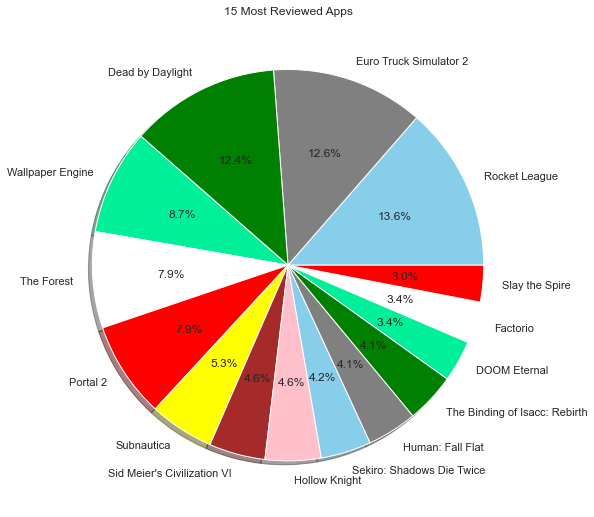

In [11]:
df = cleandf
colors = ['skyblue', 'gray', 'green', '#00f099', 'white', 'red', 'yellow', 'brown', 'pink']

reviews_per_app = df.appname.value_counts()
top_apps = reviews_per_app[:15]
fig = plt.figure(figsize=(11,9))
plt.pie(top_apps,
        labels=top_apps.index,
        colors=colors,
        autopct='%.1f%%',
        shadow=True)
plt.title("15 Most Reviewed Apps")
plt.show()

Bar Graph 

Top 15 Most Played Games

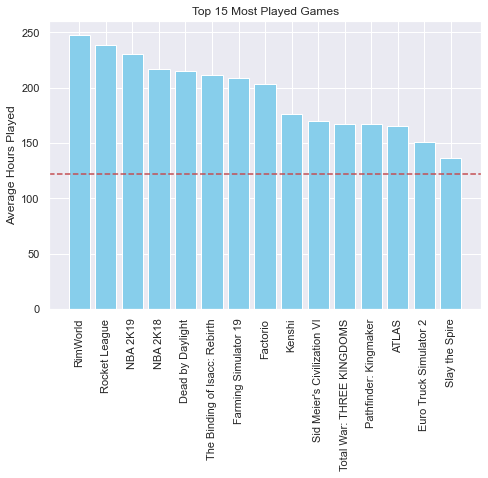

In [12]:
most_used_apps = cleandf.groupby(['appname']).mean()
most_used_apps = most_used_apps["playtime_forever"].sort_values(ascending=False)[:15]
average = cleandf['playtime_forever'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(most_used_apps.index, most_used_apps.values, color = "skyblue")
plt.xticks(rotation=90)
plt.title("Top 15 Most Played Games")
plt.ylabel("Average Hours Played")
plt.axhline(y=average, linestyle = "--", color = "r")
plt.show()

Scatter Plot 

Tried to Find correlation between playtime forever and playtime in 
last two weeks. 

Appears to have no correlation. 

Text(0.5, 0, 'playtime forever')

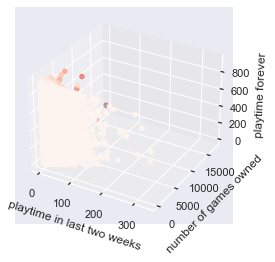

In [13]:
# playtime_forever compared to playtime_last_two_weeks with cmap of num_games_owned
# could size the num_games own 
# color based on last two weeks 
df.head()
rocket_league = df[df["appname"] == "Rocket League"]

ax = plt.axes(projection='3d')
ax.scatter3D(rocket_league.playtime_last_two_weeks, rocket_league.num_games_owned, 
             rocket_league.playtime_forever, c=rocket_league.num_games_owned, cmap='Reds')
ax.set_xlabel("playtime in last two weeks")
ax.set_ylabel("number of games owned")
ax.set_zlabel("playtime forever")

Pivot Plot 

Number of reviews each month for the top 15 reviewed apps 

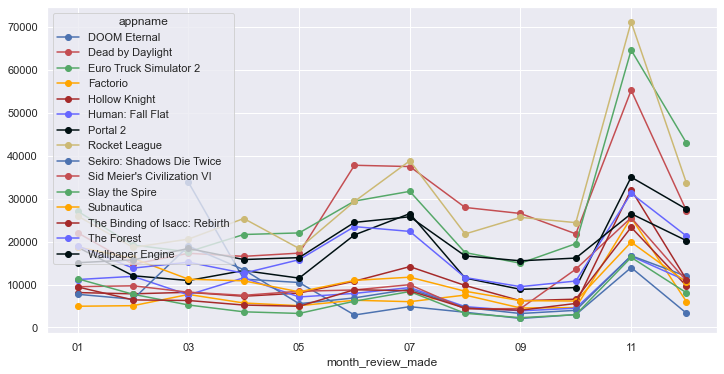

In [14]:
df.head()
reviews_per_app[:15]
df2 = df[df["appname"].isin(reviews_per_app[:15].index)]
month_reviewed_per_app = df2.groupby(["appname", "month_review_made"]).count().reset_index()
month_reviewed_per_app = month_reviewed_per_app.pivot("month_review_made", "appname", "review")
plot = month_reviewed_per_app.plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'], style="-o", figsize=(12,6))